In [43]:
from pandas import *
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA
import numpy
import pandas as pd

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load dataset
series = Series.from_csv('2015_data.csv', header=None)
# seasonal difference
X = series.values #365 days data in CSV.
#print(X)
days_in_year = 266 #70%ofdata from csv for training the model.
differenced = difference(X, days_in_year) #365-266 approx 30% data for test.
#print((differenced))
# fit model
model = ARIMA(differenced, order=(3,2,1)) #order 321 found with the least aic value.
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced) #index from where prediction starts - 100
end_index = start_index + 1050 #index where prediction ends ( custom)
print(start_index)
print(end_index)

# start_index =  '25-09-2018'
# end_index =  '25-10-2018'
# print(start_index)
forecast = model_fit.predict(start=start_index, end=end_index)
# print(forecast)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted) #add predicted values (yhat after inverting->is the predicted value) after the graph of history ends in the same graph
	day += 1

99
1149
Day 1: 785.367565
Day 2: 763.646921
Day 3: 803.485831
Day 4: 801.839035
Day 5: 802.705264
Day 6: 763.193488
Day 7: 769.509853
Day 8: 775.747833
Day 9: 785.764502
Day 10: 759.230684
Day 11: 822.673299
Day 12: 773.787570
Day 13: 795.452566
Day 14: 750.582505
Day 15: 807.580474
Day 16: 747.510993
Day 17: 759.545195
Day 18: 738.538373
Day 19: 796.524798
Day 20: 780.533127
Day 21: 766.530206
Day 22: 760.527751
Day 23: 755.529650
Day 24: 780.528707
Day 25: 752.528313
Day 26: 773.528719
Day 27: 817.528451
Day 28: 781.528401
Day 29: 765.528482
Day 30: 765.528412
Day 31: 785.528410
Day 32: 817.528424
Day 33: 798.528407
Day 34: 786.528408
Day 35: 771.528411
Day 36: 758.528407
Day 37: 777.528407
Day 38: 762.528408
Day 39: 751.528407
Day 40: 798.528407
Day 41: 774.528407
Day 42: 800.528407
Day 43: 775.528407
Day 44: 769.528407
Day 45: 784.528407
Day 46: 794.528407
Day 47: 748.528407
Day 48: 825.528407
Day 49: 765.528407
Day 50: 734.528407
Day 51: 778.528407
Day 52: 772.528407
Day 53: 765.5

1416


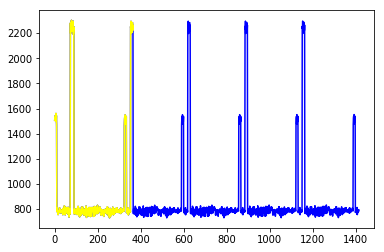

In [45]:
print(len(history))
plt.plot(history, color='blue')#predicted 365-1416
plt.plot(X, color='yellow') #actual data 0-365
#plt.plot(history[100:1416], color='blue')
